In this tutorial, we will analyze Desmoid dataset from the [WORC Database](https://github.com/MStarmans91/WORCDatabase/tree/development).

The task is to correctly identify segmented lesions as either **desmoid-type fibromatosis** or **extremity soft-tissue sarcoma**.


More details on the dataset as well as the original analysis performed by their authors can be found here:

`Starmans, M. P. A. et al. (2021). The WORC* database: MRI and CT scans, segmentations, and clinical labels for 932 patients from six radiomics studies. Submitted, preprint available from https://doi.org/10.1101/2021.08.19.21262238`

`The experiments are described in the following paper: Starmans, M. P. A. et al. (2021). Reproducible radiomics through automated machine learning validated on twelve clinical applications. Submitted, preprint available from https://arxiv.org/abs/2108.08618.`

In [1]:
# In case you haven't installed AutoRadiomics
%pip install autorad

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pathlib import Path
from autorad.external.download_WORC import download_WORCDatabase

# Set where we will save our data and results
base_dir = Path.cwd() / "autorad_tutorial"
data_dir = base_dir / "data"
result_dir = base_dir / "results"
data_dir.mkdir(exist_ok=True, parents=True)
result_dir.mkdir(exist_ok=True, parents=True)

%load_ext autoreload
%autoreload 2

In [ ]:
# download data (it may take a few minutes)
download_WORCDatabase(
    dataset="Desmoid",
    data_folder=data_dir,
    n_subjects=100,
    )

In [3]:
!ls $data_dir

Desmoid-004 Desmoid-038 Desmoid-082 Desmoid-111 Desmoid-147 Desmoid-177
Desmoid-006 Desmoid-039 Desmoid-084 Desmoid-112 Desmoid-150 Desmoid-179
Desmoid-009 Desmoid-040 Desmoid-088 Desmoid-113 Desmoid-152 Desmoid-180
Desmoid-011 Desmoid-043 Desmoid-091 Desmoid-114 Desmoid-153 Desmoid-182
Desmoid-014 Desmoid-046 Desmoid-093 Desmoid-115 Desmoid-154 Desmoid-183
Desmoid-016 Desmoid-054 Desmoid-095 Desmoid-116 Desmoid-159 Desmoid-184
Desmoid-017 Desmoid-055 Desmoid-096 Desmoid-119 Desmoid-162 Desmoid-185
Desmoid-021 Desmoid-056 Desmoid-098 Desmoid-121 Desmoid-163 Desmoid-189
Desmoid-022 Desmoid-059 Desmoid-100 Desmoid-122 Desmoid-165 Desmoid-190
Desmoid-023 Desmoid-060 Desmoid-101 Desmoid-126 Desmoid-166 Desmoid-193
Desmoid-024 Desmoid-062 Desmoid-102 Desmoid-128 Desmoid-169 Desmoid-194
Desmoid-025 Desmoid-068 Desmoid-103 Desmoid-129 Desmoid-170 Desmoid-195
Desmoid-026 Desmoid-071 Desmoid-104 Desmoid-130 Desmoid-171 Desmoid-198
Desmoid-028 Desmoid-074 Desmoid-107 Desmoid-134 Desmoid-172 Desm

In [4]:
from autorad.utils.preprocessing import get_paths_with_separate_folder_per_case

# create a table with all the paths
paths_df = get_paths_with_separate_folder_per_case(data_dir, relative=True)
paths_df.sample(5)

,ID,image_path,segmentation_path
92,Desmoid-038,Desmoid-038/image.nii.gz,Desmoid-038/segmentation.nii.gz
88,Desmoid-062,Desmoid-062/image.nii.gz,Desmoid-062/segmentation.nii.gz
68,Desmoid-102,Desmoid-102/image.nii.gz,Desmoid-102/segmentation.nii.gz
16,Desmoid-100,Desmoid-100/image.nii.gz,Desmoid-100/segmentation.nii.gz
17,Desmoid-107,Desmoid-107/image.nii.gz,Desmoid-107/segmentation.nii.gz


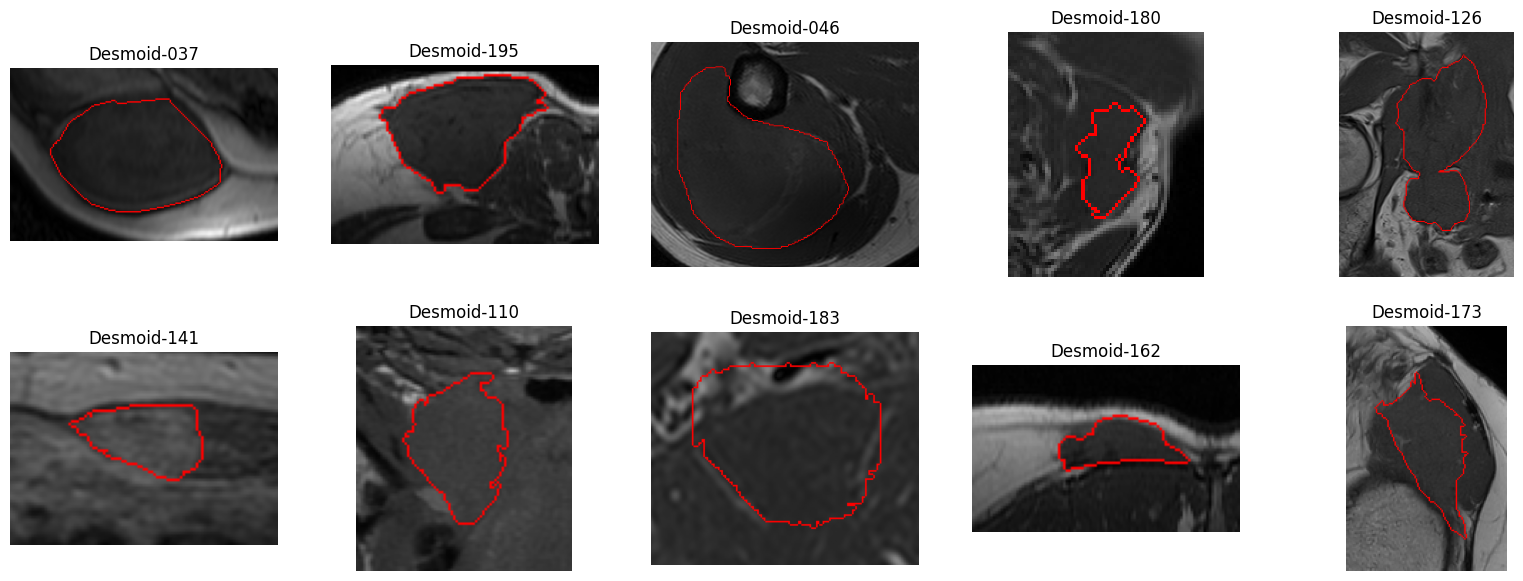

In [5]:
from autorad.data.dataset import ImageDataset
from autorad.feature_extraction.extractor import FeatureExtractor
import logging

logging.getLogger().setLevel(logging.CRITICAL)

image_dataset = ImageDataset(
    paths_df,
    ID_colname="ID",
    root_dir=data_dir,
)

# Let's take a look at the data, plotting random 10 cases
image_dataset.plot_examples(n=10, window=None)

In [6]:
extractor = FeatureExtractor(image_dataset, extraction_params="MR_default.yaml", n_jobs=4)
feature_df = extractor.run()
extractor.save_config(result_dir)

In [7]:
feature_df.head()

,ID,image_path,segmentation_path,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,Desmoid-074,/Users/pwoznicki/git/AutoRadiomics/examples/au...,/Users/pwoznicki/git/AutoRadiomics/examples/au...,0.873614,0.718321,77.484876,107.869387,125.299641,123.547562,115.741090,...,0.093642,0.002011,0.160422,154.590314,0.000404,0.748296,0.000444,5875.243768,0.024981,2.365077
1,Desmoid-011,/Users/pwoznicki/git/AutoRadiomics/examples/au...,/Users/pwoznicki/git/AutoRadiomics/examples/au...,0.542448,0.390360,58.364379,149.514354,188.401875,167.332217,99.639350,...,0.016457,0.000799,0.237547,755.595992,0.000219,0.084894,0.002416,10870.016237,0.097748,17.527386
2,Desmoid-016,/Users/pwoznicki/git/AutoRadiomics/examples/au...,/Users/pwoznicki/git/AutoRadiomics/examples/au...,0.877737,0.688334,13.471395,19.571016,20.645580,23.785710,20.000000,...,0.149263,0.045806,0.948276,8401.258621,0.019942,0.007245,0.043044,59786.729501,42.221257,502.761901
3,Desmoid-043,/Users/pwoznicki/git/AutoRadiomics/examples/au...,/Users/pwoznicki/git/AutoRadiomics/examples/au...,0.652264,0.521467,19.868718,38.101603,39.999998,32.022488,37.363083,...,0.181909,0.011578,0.288275,132.252424,0.002828,0.101257,0.014747,2358.690153,0.178728,13.098294
4,Desmoid-088,/Users/pwoznicki/git/AutoRadiomics/examples/au...,/Users/pwoznicki/git/AutoRadiomics/examples/au...,0.768909,0.502069,13.406080,26.701656,28.736050,29.851676,28.635642,...,0.004161,0.003951,0.797606,3513.162189,0.003910,0.010388,0.018038,41901.340071,1.686317,52.578613


In [8]:
label_df = pd.read_csv(data_dir / "labels.csv")
label_df.sample(5)

,patient_ID,diagnosis
88,Desmoid-189,0
41,Desmoid-116,1
76,Desmoid-024,0
39,Desmoid-107,1
43,Desmoid-128,1


In [9]:
from autorad.data.dataset import FeatureDataset

merged_feature_df = feature_df.merge(label_df, left_on="ID",
    right_on="patient_ID", how="left")
feature_dataset = FeatureDataset(
    merged_feature_df,
    target="diagnosis",
    ID_colname="ID"
)

Split the data into training/validation/test sets with stratification:

In [10]:
splits_path = result_dir / "splits.json"
feature_dataset.split(method="train_val_test", save_path=splits_path)

{'split_type': 'stratified split: 60% train + 20% validation + 20% test',
 'train': ['Desmoid-165',
  'Desmoid-059',
  'Desmoid-163',
  'Desmoid-190',
  'Desmoid-141',
  'Desmoid-030',
  'Desmoid-150',
  'Desmoid-022',
  'Desmoid-084',
  'Desmoid-162',
  'Desmoid-009',
  'Desmoid-147',
  'Desmoid-111',
  'Desmoid-112',
  'Desmoid-171',
  'Desmoid-028',
  'Desmoid-128',
  'Desmoid-136',
  'Desmoid-062',
  'Desmoid-166',
  'Desmoid-104',
  'Desmoid-170',
  'Desmoid-184',
  'Desmoid-004',
  'Desmoid-140',
  'Desmoid-068',
  'Desmoid-199',
  'Desmoid-134',
  'Desmoid-093',
  'Desmoid-153',
  'Desmoid-121',
  'Desmoid-056',
  'Desmoid-195',
  'Desmoid-103',
  'Desmoid-096',
  'Desmoid-189',
  'Desmoid-036',
  'Desmoid-043',
  'Desmoid-026',
  'Desmoid-152',
  'Desmoid-037',
  'Desmoid-119',
  'Desmoid-194',
  'Desmoid-109',
  'Desmoid-169',
  'Desmoid-101',
  'Desmoid-130',
  'Desmoid-100',
  'Desmoid-201',
  'Desmoid-039',
  'Desmoid-173',
  'Desmoid-025',
  'Desmoid-175',
  'Desmoid-114',

In [11]:
from autorad.models.classifier import MLClassifier
from autorad.training.trainer import Trainer

models = MLClassifier.initialize_default_sklearn_models()
print(models)

[Random Forest, Logistic Regression, SVM, XGBoost]


In [12]:
from autorad.preprocessing.preprocessor import run_auto_preprocessing

run_auto_preprocessing(
    data=feature_dataset.data,
    use_feature_selection=True,
    feature_selection_methods=None,
    oversampling_methods=None,
    result_dir=result_dir,
    )

trainer = Trainer(
    dataset=feature_dataset,
    models=models,
    result_dir=result_dir,
)

In [14]:
# autoreload packages
%autoreload 2

trainer.set_optimizer("optuna", n_trials=30)
trainer.run(auto_preprocess=True)

[I 2022-12-10 00:18:11,500] A new study created in memory with name: radiomics
[I 2022-12-10 00:18:12,305] Trial 0 finished with value: 0.4780219780219781 and parameters: {'feature_selection_method': 'anova', 'oversampling_method': None, 'model': 'Random Forest', 'rf_n_estimators': 743, 'rf_max_depth': 23, 'rf_max_features': 'sqrt', 'rf_min_samples_leaf': 8, 'rf_min_samples_split': 3, 'rf_bootstrap': False}. Best is trial 0 with value: 0.4780219780219781.
[I 2022-12-10 00:18:12,596] Trial 1 finished with value: 0.5 and parameters: {'feature_selection_method': 'boruta', 'oversampling_method': 'ADASYN', 'model': 'XGBoost', 'xgb_lambda': 0.9210494085297024, 'xgb_alpha': 4.33701173245827, 'colsample_bytree': 0.544690210663715, 'xgb_subsample': 0.594948078120245, 'xgb_booster': 'dart', 'xgb_max_depth': 9, 'xgb_min_child_weight': 10, 'xgb_eta': 0.00010344116594294054, 'xgb_gamma': 0.0009808974699196515, 'xgb_grow_policy': 'lossguide', 'xgb_sample_type': 'weighted', 'xgb_normalize_type': 'for

In [17]:
from autorad.utils import io
from autorad.visualization import plotly_utils
from autorad.inference import infer_utils, infer

artifacts = infer_utils.get_artifacts_from_best_run()

inferrer = infer.Inferrer(
    model=artifacts["model"],
    preprocessor=artifacts["preprocessor"],
    result_dir=result_dir,
)
feature_df = infer.infer_radiomics_features(
    img_path,
    mask_path,
    artifacts["extraction_param_path"],
)

feature_df.to_csv(Path(result_dir) / "infer_df.csv")
result = inferrer.predict(feature_df)

best_params = io.load_json(result_dir / "best_params.json")
inferrer = Inferrer(params=best_params, result_dir=result_dir)
inferrer.fit_eval(feature_dataset, result_name="test")

results = pd.read_csv(result_dir / "test.csv")
plotly_utils.plot_roc_curve(results.y_true, results.y_pred_proba)

In [18]:
results

,y_true,y_pred_proba
0,1,0.701146
1,1,0.813211
2,1,0.854735
3,1,0.669586
4,1,0.584012
5,1,0.690050
6,1,0.036321
7,1,0.914180
8,1,0.634421
9,1,0.912092
